## County Data and Small Businesses Growth

This track intends to test the following hypotheses:

1. Small businesses in counties with high urban population are more affected by the economic fluctuations
2. Economic crisis had a stronger effect on average county salary with more small and medium busineses present
3. The effect of growing Fortune 500 companies is rather drastic (negative in regards to small and medium businesses) 

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
% matplotlib inline

In [139]:
county_data = pd.read_csv('county_data_final.csv')
bankrupcy_data = pd.read_csv('bankrupcy_data_final.csv')

In [15]:
county_group_year = county_data.groupby('year').mean()

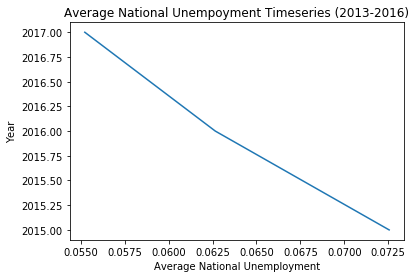

In [89]:
# What happened to average employment for the last 5 years?
plt.plot(county_group_year['unemployment'], county_group_year.index)
plt.title("Average National Unempoyment Timeseries (2013-2016)")
plt.ylabel("Year")
plt.xlabel("Average National Unemployment")
plt.show()

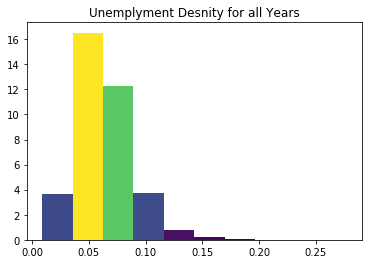

In [93]:
# Histogram for all of the US
N, bins, patches = plt.hist(county_data['unemployment'].dropna(), density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
plt.title("Unemplyment Desnity for all Years")
plt.show()

In [55]:
county_data_2013 = county_data.loc[county_data['year'] == 2013]
county_data_2014 = county_data.loc[county_data['year'] == 2014]
county_data_2015 = county_data.loc[county_data['year'] == 2015]
county_data_2016 = county_data.loc[county_data['year'] == 2016]
county_data_2017 = county_data.loc[county_data['year'] == 2017]

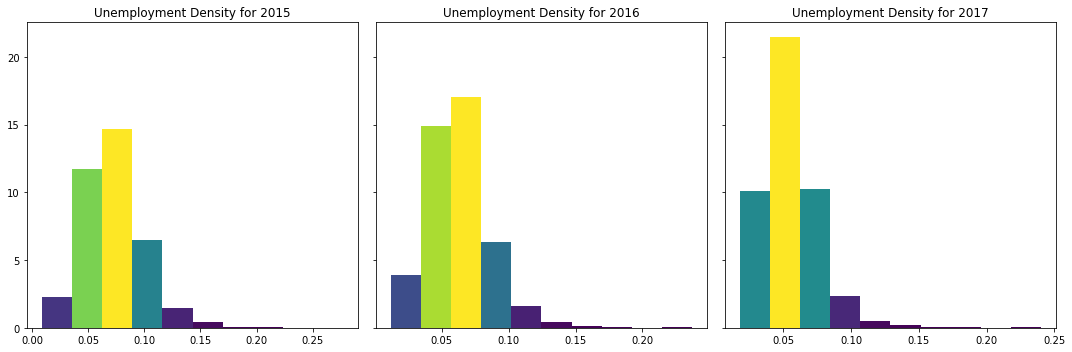

In [88]:
# But how is unemployment distributed across the years?
fig, axs = plt.subplots(1, 3, sharey=True, tight_layout=True, figsize=(15, 5))
N, bins, patches = axs[0].hist(county_data_2015['unemployment'].dropna(), density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[0].set_title("Unemployment Density for 2015")
N, bins, patches = axs[1].hist(county_data_2016['unemployment'].dropna(), density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[1].set_title("Unemployment Density for 2016")
N, bins, patches = axs[2].hist(county_data_2017['unemployment'].dropna(), density=True)
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)
axs[2].set_title("Unemployment Density for 2017")
import warnings; warnings.simplefilter('ignore')
fig.show()

** Observation:** There's a growing right tail of counties with high unemployment while the center of the distribution seems to go down (derease)

** Hypothesis:** Could this be driven by small and medium businesses?

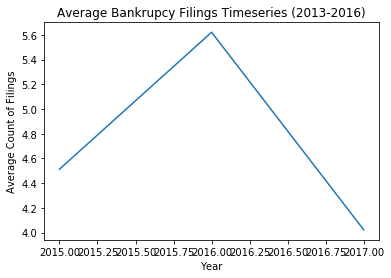

In [144]:
# Next, let's correlate bankrupcy into the picture
bankrupcy_group_year = bankrupcy_data.groupby('year').mean()
# What happened to average employment for the last 5 years?
plt.plot(bankrupcy_group_year.index, bankrupcy_group_year['Total'])
plt.title("Average Bankrupcy Filings Timeseries (2013-2016)")
plt.xlabel("Year")
plt.ylabel("Average Count of Filings")
plt.show()

In [145]:
bankrupcy_data.columns

Index(['year', 'county', 'county code', 'Total', ' Chap.7', ' Chap.11',
       ' Chap.12', 'Chap.13'],
      dtype='object')

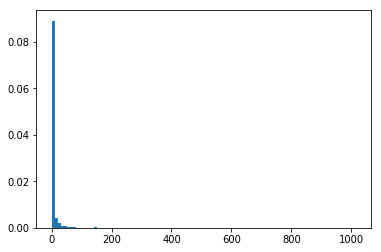

In [161]:
plt.hist(bankrupcy_data['Total'].dropna(), bins = 100, density=True)
plt.show()

In [164]:
# So bankrupcy does seem to concentrate around specififc small counties. This goes in support
# of our hypothesis

Text(0.5,0,'Average National Income')

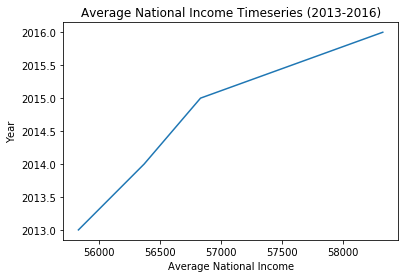

In [24]:
# What income on a National Income Level?
plt.plot(county_group_year['income'], county_group_year.index)
plt.title("Average National Income Timeseries (2013-2016)")
plt.ylabel("Year")
plt.xlabel("Average National Income")

## Questions for Further Research:
1. The story looks positive, but is it the case across all of the US? 
2. How does it tie with Small and Medium Business Growth? Let's compare the numbers.